In [87]:
"""
Full Dataset

-------------------------------------------------
|                                               |
-------------------------------------------------

Regular Splitting

-------------------------------------------------
|            70%                |  15%  |  15%  |
-------------------------------------------------

Cross Validation

-------------------------------------------------
|   1   |   2   |   3   |   4   |   5   |   6   |
-------------------------------------------------
"""

'\nFull Dataset\n\n-------------------------------------------------\n|                                               |\n-------------------------------------------------\n\nRegular Splitting\n\n-------------------------------------------------\n|            70%                |  15%  |  15%  |\n-------------------------------------------------\n\nCross Validation\n\n-------------------------------------------------\n|   1   |   2   |   3   |   4   |   5   |   6   |\n-------------------------------------------------\n'

In [88]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                            StratifiedKFold,
                            cross_validate
                            )
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

#### 01. Load the Data


In [89]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

#### 02. Configure K-Fold 

In [90]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [91]:
model_lr = LogisticRegression(
                    random_state=42,
                    max_iter=1000
                    )

In [92]:
cv_results = cross_validate(
                        model_lr,
                        X_train,
                        Y_train,
                        cv=cv, scoring='precision',  # accuracy
                        return_train_score=True
)

In [93]:
cv_results

{'fit_time': array([0.00699949, 0.0069952 , 0.00699544, 0.00699949, 0.00699854,
        0.00699925]),
 'score_time': array([0.00200224, 0.00200391, 0.00200343, 0.00200009, 0.00200009,
        0.00200105]),
 'test_score': array([0.71624088, 0.73247779, 0.70943396, 0.69150943, 0.74181118,
        0.71687321]),
 'train_score': array([0.72121444, 0.7176761 , 0.72133637, 0.72299849, 0.71509972,
        0.71801172])}

In [94]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                        model_lr,
                        X_train,
                        Y_train,
                        cv=cv, scoring=score,
                        return_train_score=False
                        )
    
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)

    print(f"{score} : {test_score_avg}")

accuracy : 0.7164898412269761
precision : 0.7180577414676202
recall : 0.7133457753547016
f1 : 0.7155921387324043


In [95]:
cv_results = cross_validate(
                            model_lr,
                            X_train, Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
                            )
cv_results


{'fit_time': array([0.00700068, 0.01200414, 0.00900149, 0.01100469, 0.01050973,
        0.00799847]),
 'score_time': array([0.00200272, 0.00199437, 0.0039978 , 0.002002  , 0.00199938,
        0.00200033]),
 'test_score': array([0.72853828, 0.71621622, 0.70943396, 0.69150943, 0.73438245,
        0.71347249])}

In [96]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [97]:
model_lr = LogisticRegression(
                    random_state=42,
                    max_iter=1000
                    )
model_lr.fit(X_train_best, Y_train_best)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)


In [99]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [100]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")

accuracy : 0.7155
precision : 0.37283236994219654
recall : 0.6564885496183206
f1_score : 0.47557603686635946


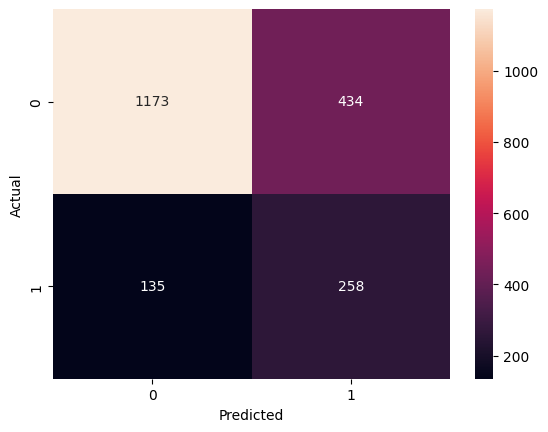

In [101]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()